# Tree comparison

## case_insensitiv: changed GZMA_Canis_lupus to GZMA_Canis_lupus_1

In [1]:
out_dir = "./out_dir/"
work_dir = "."
input = "./inputs/"
t1 = str(out_dir) + "KLK.newick"
t2 = str(out_dir) + "KLK_esm2_upgma_499_cosine.newick"

In [2]:
from ete3 import Tree

tree1_ete = Tree(t1)
tree2_ete = Tree(t2)


#results = tree1.compare(tree2,unrooted=True)
#results

rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2  = tree1_ete.robinson_foulds(tree2_ete,unrooted_trees=True)
print("RF distance is %s over a total of %s" %(rf, max_rf))
print("Partitions in tree2 that were not found in tree1:", len(parts_t1 - parts_t2))
print("Partitions in tree1 that were not found in tree2:", len(parts_t2 - parts_t1))

RF distance is 782 over a total of 850
Partitions in tree2 that were not found in tree1: 382
Partitions in tree1 that were not found in tree2: 400


In [3]:
import dendropy 
from dendropy import Tree 
from dendropy.calculate import treecompare

tns = dendropy.TaxonNamespace()
tree1 = Tree.get(path=t1,
        schema="newick",taxon_namespace=tns)#,case_sensitive_taxon_labels=True)
tree2 = Tree.get(
        path=t2,
        schema="newick",taxon_namespace=tns)#,case_sensitive_taxon_labels=True)

#!!!! Problem with reading case insensitive leaf nodes !!!!
#changed GZMA_Canis_lupus to GZMA_Canis_lupus_1: case_insensitvity 

tree1.encode_bipartitions()
tree2.encode_bipartitions()

print("euclidean_distance: "+str(treecompare.euclidean_distance(tree1, tree2)))
print("symmetric_difference: "+str(treecompare.symmetric_difference(tree1, tree2)))
print("false_positives_and_negatives: "+str(treecompare.false_positives_and_negatives(tree1, tree2)))
print("robinson_foulds_distance: "+str(treecompare.robinson_foulds_distance(tree1, tree2)))

euclidean_distance: 5.02489224073134
symmetric_difference: 786
false_positives_and_negatives: (401, 385)
robinson_foulds_distance: 114.71747431499992


# Draw Tree with Circos

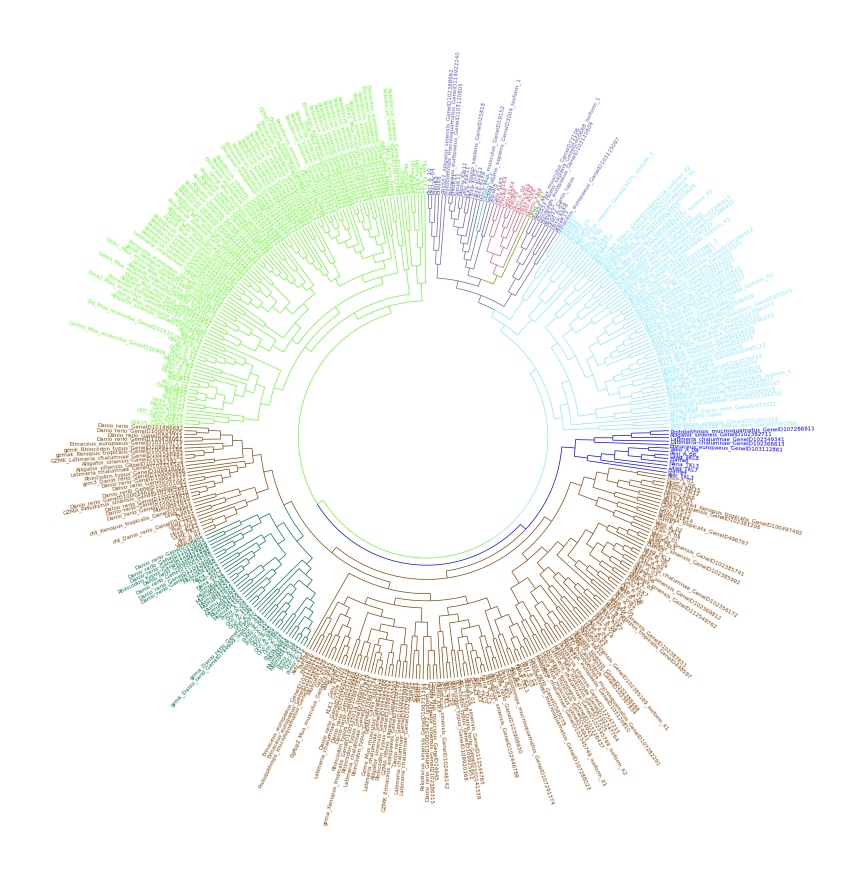

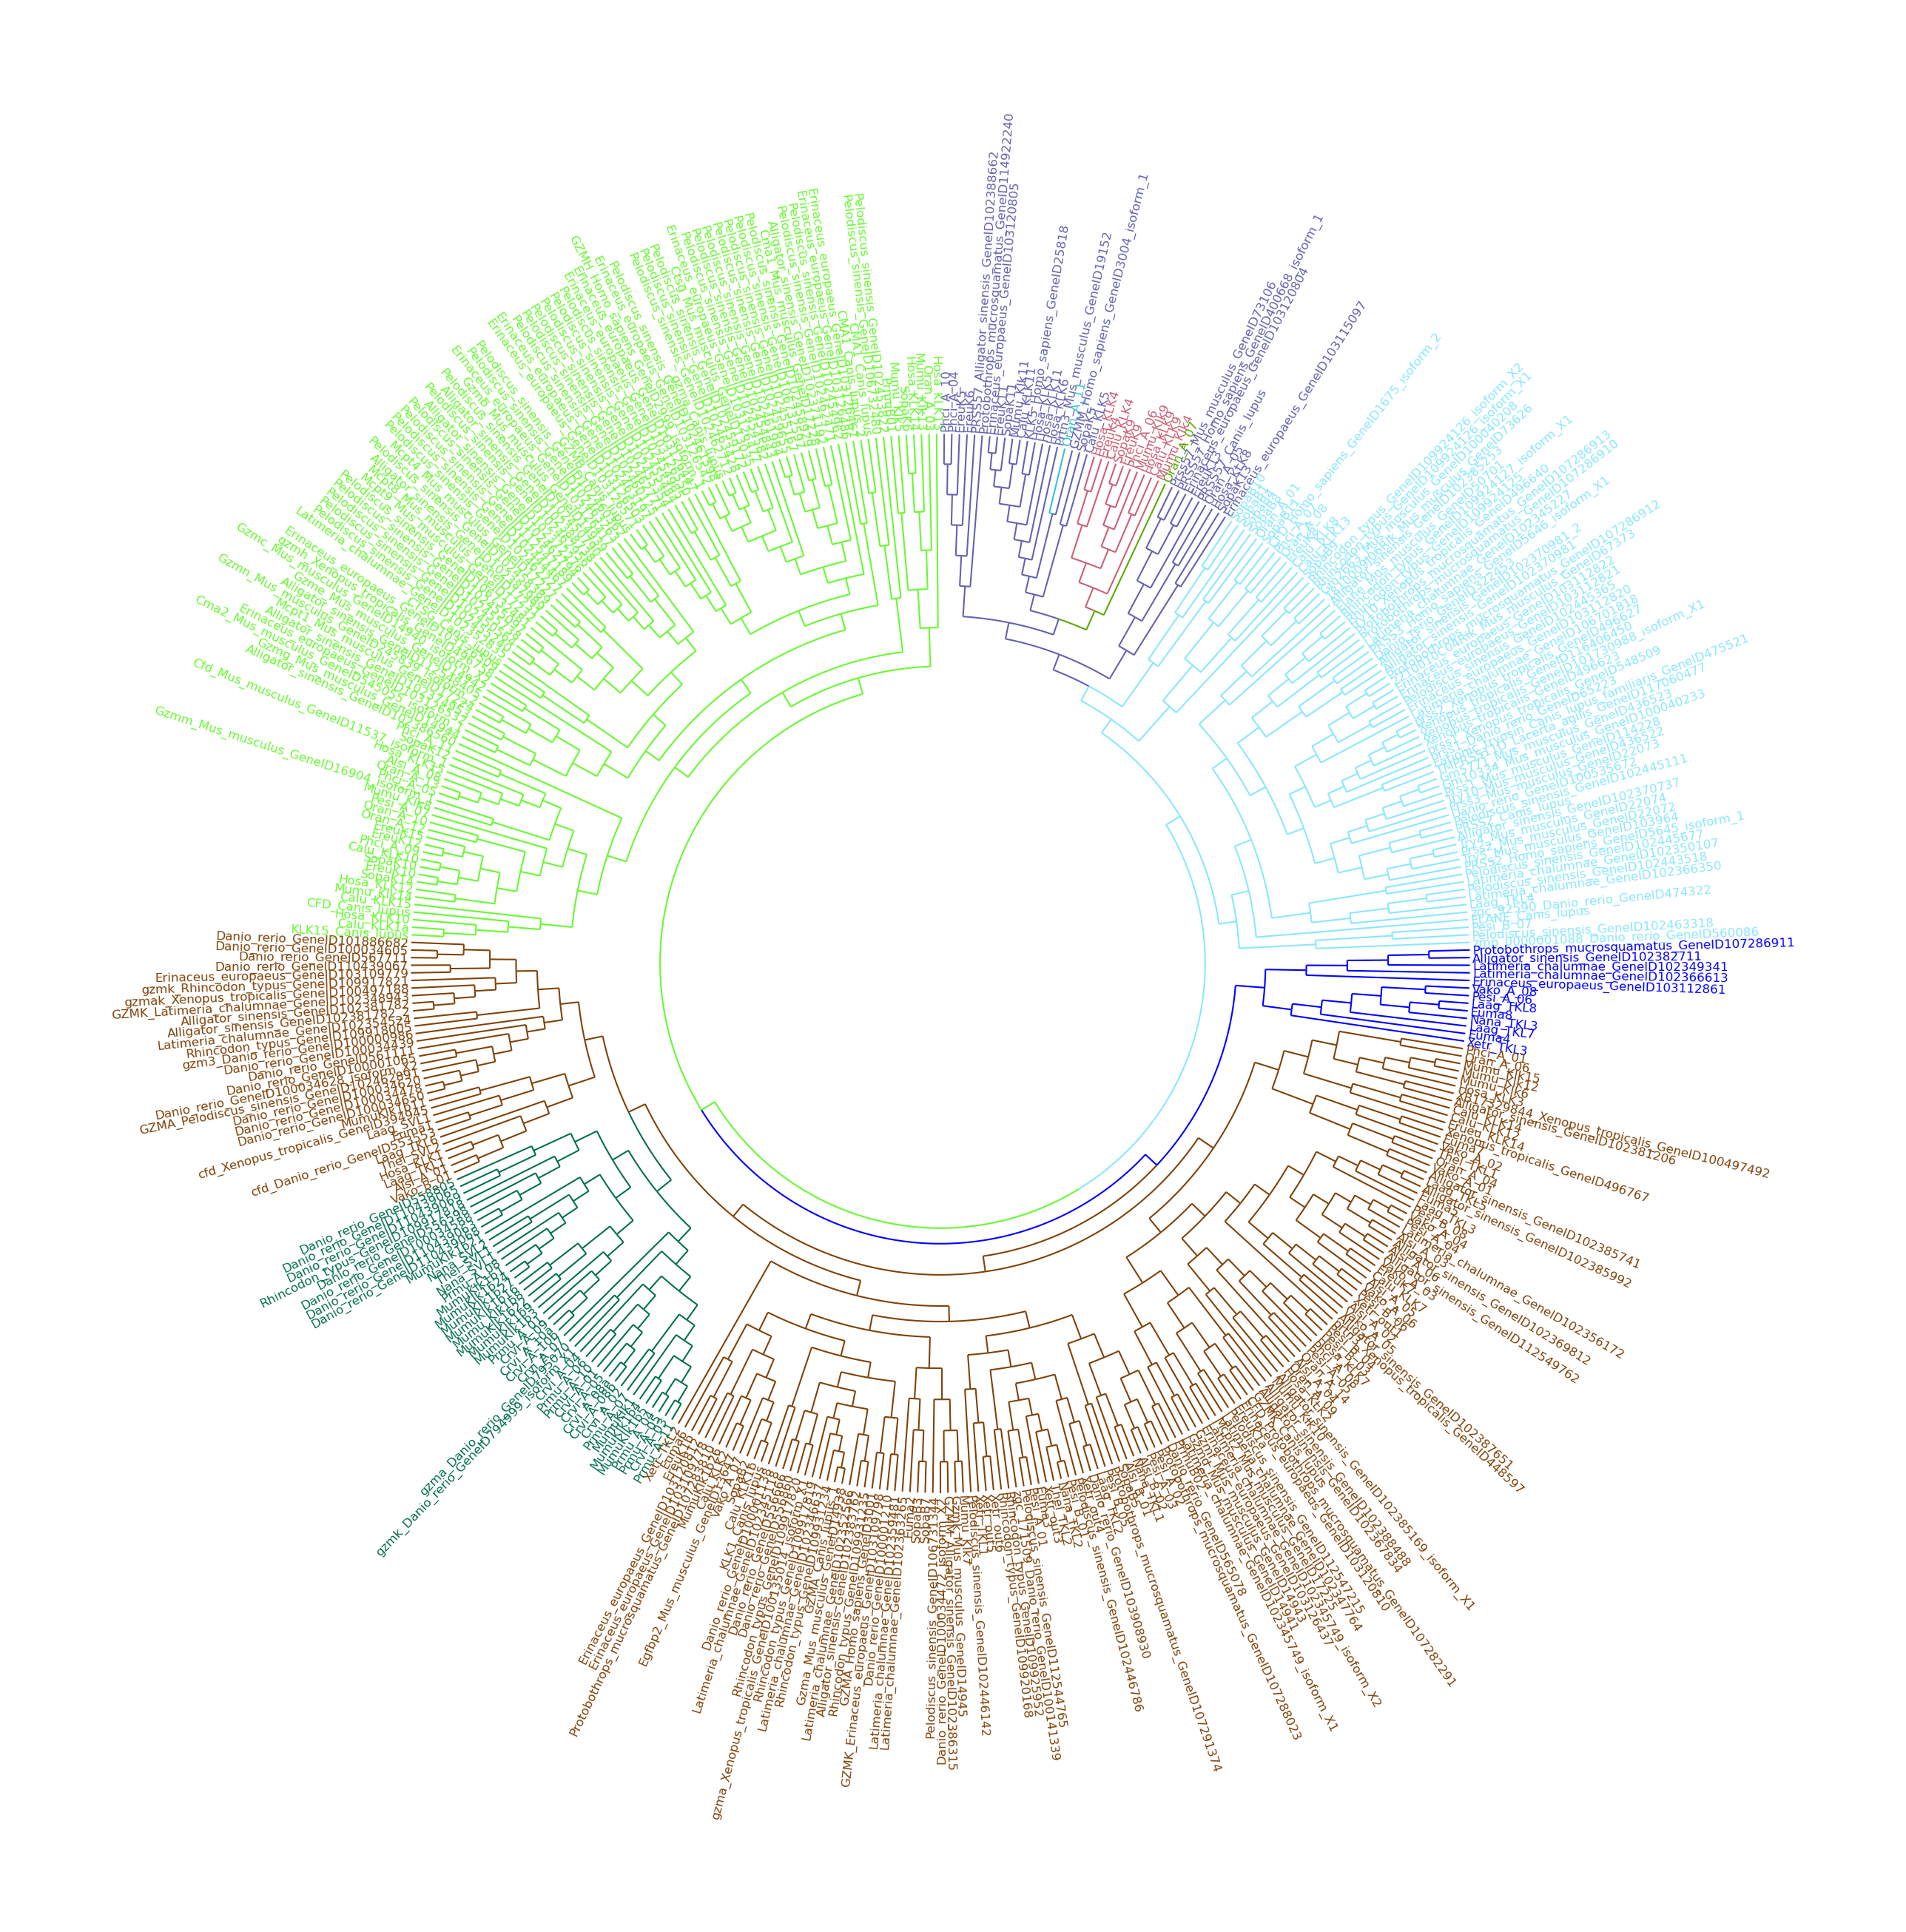

In [4]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo
import csv


tree_in = t2

#read color_file
dict_color = {}
with open(str(input) + "KLK_iTOL.txt") as csv_file:
    for row in csv.reader(csv_file, delimiter='\t'):
        if len(row) > 1:
            key = row[2]
            if key in dict_color:
                dict_color[key].append(row[0])
            else:
                dict_color[key] = [row[0]]
                
list_of_color = [(value,key) for key, value in dict_color.items()]                                    


#create tree
tree = Phylo.read(tree_in, "newick")

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((50, 100))
track.tree(tree,leaf_label_size=4, node_color_list=list_of_color)

fig = circos.plotfig()
circos.savefig(str(out_dir) + "KLK_prott5.png", dpi=300)

# Format change

# Convert h5 to npz

In [5]:
import h5py
h5_file = str(input) + "KLK_prott5.h5"
prott5 = True

#make numpy file with (seq header, embedding)
esm2 = h5py.File(h5_file, 'r')
list(esm2.keys())
# List all groups
keys = list(esm2.keys())
#print(keys) 
# Get the data
esm2values = []
headers = []
for key in keys:
    #data
    emb = esm2[key][:]
    #value = np.array(esm2[key][:])
    #print(value)
    if prott5:
        esm2values.append(emb[0])
    else:    
        esm2values.append(emb)
    #headers
    key = key.replace("isoform=", "isoform_").replace("=", "").replace(":", "_")
    
    #check case-sensitivity
    if key.lower() in (item.lower() for item in headers):
        print('The string is in list: '+key)
        key = key+"_01"
        print('New key: '+key)
    
    headers.append(key)

#np.savez("/Users/adel.schmucklermann/Desktop/FoPra/KLK/KLK_prott5.npz", headers=headers, embedding=esm2values)

NameError: name 'h5py' is not defined

# Convert Nexus to Newick

In [ ]:
import dendropy
post_trees = dendropy.TreeList()
post_trees.read(
         file=open(str(out_dir) + "KLK.nexus", "r"),
         schema="nexus")
post_trees.write(
     path=str(out_dir) + "KLK.newick",schema="newick")

#changed GZMA_Canis_lupus to GZMA_Canis_lupus_1: case_insensitvity 